In [1]:
%load_ext autoreload
%autoreload 2


import torch

import torch.nn as nn
from torch.distributions import Categorical, Poisson, MixtureSameFamily
from matplotlib import pyplot as plt


# Cd to code
import os
import sys
os.chdir('/cluster/home/kheuto01/code/prob_diff_topk')
sys.path.append('/cluster/home/kheuto01/code/prob_diff_topk')

from datasets import example_datasets, to_numpy
from torch_perturb.torch_pert_topk import PerturbedTopK
from torch_models import MixtureOfPoissonsModel, torch_bpr_uncurried
from torch_distributions import TruncatedNormal

2024-07-12 14:59:14.718227: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-12 14:59:14.767742: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 14:59:14.767777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 14:59:14.768807: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-12 14:59:14.776295: I tensorflow/core/platform/cpu_feature_guar

In [16]:
mydist = TruncatedNormal(loc=0., scale=0.005, a=-0.2, b=.2)

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        3.000e+00, 9.000e+00, 7.000e+00, 8.000e+00, 8.000e+00, 1.200e+01,
        2.400e+01, 2.200e+01, 3.500e+01, 4.300e+01, 6.400e+01, 7.700e+01,
        7.700e+01, 1.170e+02, 1.420e+02, 1.780e+02, 2.370e+02, 2.520e+02,
        2.850e+02, 3.880e+02, 4.320e+02, 5.000e+02, 5.840e+02, 7.230e+02,
        7.560e+02, 9.320e+02, 1.052e+03, 1.233e+03, 1.355e+03, 1.500e+03,
        1.650e+03, 1.830e+03, 1.964e+03, 2.223e+03, 2.358e+03, 2.428e+03,
        2.647e+03, 2.929e+03, 2.998e+03, 3.057e+03, 3.243e+03, 3.242e+03,
        3.390e+03, 3.433e+03, 3.395e+03, 3.324e+03, 3.354e+03, 3.340e+03,
        3.192e+03, 3.014e+03, 2.981e+03, 2.860e+03, 2.695e+03, 2.510e+03,
        2.358e+03, 2.214e+03, 1.987e+03, 1.881e+03, 1.578e+03, 1.449e+03,
        1.360e+03, 1.212e+03, 1.043e+03, 9.390e+02, 7.490e+02, 7.150e+02,
        5.600e+02, 4.960e+02, 4.160e+02, 3.800e+02, 3.040e+02, 2.410e+02,
        2.060e+02, 1.620e+02, 1.470e+0

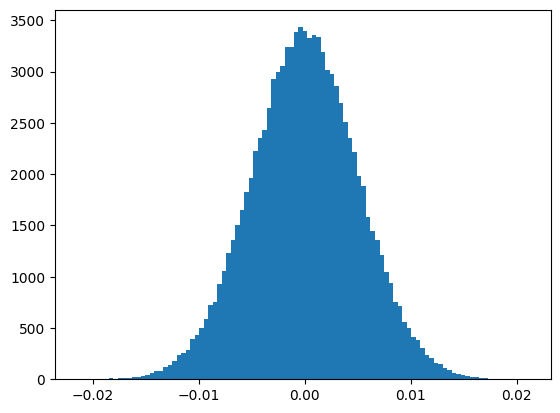

In [17]:
plt.hist(mydist.sample((100000,)).numpy(), bins=100)